# PRÁCTICA 8 CAN-GIA. Diferenciación de funciones de varias variables. 

El módulo **SymPy** nos permite calcular derivadas parciales. En esta práctica, estudiaremos cómo calcular derivadas parciales de primer orden y derivadas direccionales usando el vector gradiente. También veremos cómo calcular la matriz hessiana de forma exacta con **SymPy**, lo que nos permitirá, entre otras cosas, clasificar extremos locales.

### Objetivos:
- Cálculo de derivadas parciales de primer orden
- Cálculo del gradiente y de derivadas direccionales
- Representación gráfica del gradiente
- Cálculo de la matriz hessiana
- Clasificación de puntos críticos de una función de dos variables
- Cálculo de los extremos absolutos de una función de dos variables

Como es habitual, importamos el  módulo **SymPy** 

In [2]:
import sympy as sp

## Cálculo de derivadas parciales de primer orden
El cálculo  de derivadas parciales de funciones de varias variables se realiza de forma similar al caso de una variable, especificando la variable respecto a la cual derivamos:

In [4]:
# Definimos las variables simbólicas x, y
x, y = sp.symbols('x y', real=True) 
# Definimos la función de dos variables f
f = sp.Lambda((x,y), x/((x+y)*y)) 
# Calculamos la derivada parcial de f con respecto a la variable x
dfx = sp.diff(f(x,y),x) 
# Empleamos sp.factor para simplificar la expresión de las derivadas
display(sp.factor(dfx)) 
# Calculamos la derivada parcial de f con respecto a la variable y y simplificamos
dfy = sp.diff(f(x,y),y) 
display(sp.factor(dfy))

(x + y)**(-2)

-x*(x + 2*y)/(y**2*(x + y)**2)

Podemos comprobar que las expresiones calculadas coinciden con la definición basada en el cálculo de límites de cocientes incrementales al variar la variable $x$ ó $y$, según corresponda.

In [5]:
# Definimos la variable simbólica h
h = sp.Symbol('h', real=True) 
# Calculamos la derivada parcial de f respecto a x usando la definición
dfx_def_positivo = sp.limit((f(x+h,y)-f(x,y))/h,h,0) 
dfx_def_negativo = sp.limit((f(x+h,y)-f(x,y))/h,h,-0) 
display(sp.factor(dfx_def_positivo))  
# Calculamos la derivada parcial de f respecto a y usando la definición
dfy_def = sp.limit((f(x,y+h)-f(x,y))/h,h,0) 
display(sp.factor(dfy_def))

(x + y)**(-2)

-x*(x + 2*y)/(y**2*(x + y)**2)

In [ ]:
#se sustituye en la propia definción
# Calculado en el (1,0)


f = sp.Lambda((x,y), sp.Abs(x*y)) 
h = sp.Symbol('h',real = True)
dfx_def = sp.limit((f(1+h,0)-f(1,0))/h,h,0)
dfx_def_nega = sp.limit((f(1+h,0)-f(1,0))/h,h,0,'-')  
display (dfx_def,dfx_def_nega)


dfy_def = sp.limit((f(1,0+h)-f(1,0))/h,h,0) 

# Tiende a -0
dfy_def_nega = sp.limit((f(1,0+h)-f(1,0))/h,h,0, '-') 
display (dfy_def,dfy_def_nega)


# Como los límites no son iguales, no existe derivada en ese punto

0

0

1

-1

### **Ejercicio 1**

Calcula todas las derivadas parciales de primer orden de la función dependiente de cuatro variables $f(x,y,z,u)=\displaystyle\frac{y+x-z}{u-x^3}$.

In [ ]:
# TU CÓDIGO AQUÍ
# Definimos las variables simbólicas x, y
x, y, z , u = sp.symbols('x y z u', real=True) 
# Definimos la función de dos variables f
f = sp.Lambda((x,y,z,u),y+x-z/u-x**3) 
# Calculamos la derivada parcial de f con respecto a la variable x
dfx = sp.diff(f(x,y,z,u), x) 
# Empleamos sp.factor para simplificar la expresión de las derivadas
display(sp.factor(dfx)) 

# Calculamos la derivada parcial de f con respecto a la variable y y simplificamos
dfy = sp.diff(f(x,y,z,u),y) 
display(sp.factor(dfy))

# Calculamos la derivada parcial de f con respecto a la variable z
dfz = sp.diff(f(x,y,z,u), z) 
display(sp.factor(dfz))  

# Calculamos la derivada parcial de f con respecto a la variable u y simplificamos
dfu = sp.diff(f(x,y,z,u),u) 
display(sp.factor(dfu))

1 - 3*x**2

1

-1/u

z/u**2

## Cálculo del vector gradiente
A partir del cálculo de las derivadas parciales de primer orden, también podemos calcular el vector gradiente. Para evitar complicaciones en la implementación, definimos nuestra propia función para calcular gradientes, almacenando las componentes del vector gradiente en una lista:

In [8]:
def gradient(expr, varlist):
    # Calculamos el gradiente y los almacenamos en una lista
    return [sp.diff(expr,var) for var in varlist] 

El vector gradiente se calcula y almacena en una lista, donde cada derivada parcial se guarda en la lista siguiendo el orden de las variables empleado en la definición. Por ejemplo, en el caso de $$f(x,y)=3x^2-5y^2$$, obtenemos que 
$$
\nabla f(x,y)=
\begin{pmatrix}
6x\\
-10y
\end{pmatrix}.
$$

In [ ]:
# Definimos las variables simbólicas x e y
x, y = sp.symbols('x y', real=True) 

# Definimos la función de dos variables f
f = sp.Lambda((x,y), 3*x**2-5*y**2)

# Calculamos el gradiente de f usando las variables (x,y)

grad_f = gradient(f(x,y),(x,y)) 
display(grad_f)

[6*x, -10*y]

## Cálculo de derivadas direccionales
La derivada direccional en la dirección del vector unitario $\vec{u}$ se puede calcular mediante el producto escalar del gradiente por el vector unitario, esto es, $D_{\vec{u}}f=\nabla f\cdot\vec{u}$. Como en esta práctica estamos empleando listas para almacenar los vectores, debemos implementar también una función **Python** para calcular el producto escalar de 2 listas (no se puede usar la función `np.dot` porque no estamos trabajando con objetos de la clase `np.array`):

In [ ]:
def dot(u, v):
    # Cálculo del producto interior de dos vectores almacenados en listas
    return sum([a*b for a,b in zip(u, v)])

Usando la función `dot` que acabamos de definir, el cálculo de $D_{\vec{u}}f=\nabla f\cdot\vec{u}$ es inmediato. Veamos  un ejemplo donde se calcula la derivada direccional de $f(x,y)=3x+2y$ en la dirección del vector unitario $\vec{u}=(-1,1)^{t}/\sqrt{2}$:

In [ ]:
# Definimos la función de dos variables f
f = sp.Lambda((x,y),3*x+2*y)

# Definimos el vector unitario que define la dirección
u = [-1/sp.sqrt(2), 1/sp.sqrt(2)] 

Dfu = dot(gradient(f(x,y),(x,y)),u)

display(Dfu)

-sqrt(2)/2

### **Ejercicio 2**

Calcula la derivada direccional de la función $f(x,y,z,u)=\displaystyle\frac{y+x-z}{u-x^3}$ con respecto a la dirección indicada por el vector $\vec{v}=(1,0,-1,1)^t/\sqrt{3}$ en el punto $(2,1,-2,1)$.

In [50]:
# TU CÓDIGO AQUÍ
# Definimos las variables simbólicas x, y
x, y, z , u = sp.symbols('x y z u', real=True) 
# Definimos la función de dos variables f
f = sp.Lambda((x,y,z,u),(y+x-z)/(u-x**3)) 
display(f)
v = [1/sp.sqrt(3),0,-1/sp.sqrt(3),1/sp.sqrt(3)] 
Dfu = dot(gradient(f(x,y,z,u),(x,y,z,u)),v)
display(Dfu)
dfu = sp.Lambda((x,y,z,u),Dfu)
display(sp.N(dfu(2,1,-2,1)))

Lambda((x, y, z, u), (x + y - z)/(u - x**3))

sqrt(3)*(3*x**2*(x + y - z)/(u - x**3)**2 + 1/(u - x**3))/3 + sqrt(3)/(3*(u - x**3)) - sqrt(3)*(x + y - z)/(3*(u - x**3)**2)

0.483089000750503

## Representación gráfica de gradientes y curvas de nivel

Se puede demostrar que los vectores tangentes a una curva de nivel son perpediculares al vector gradiente de la función en el punto correspondiente. Lo mostramos con el ejemplo siguiente:
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right),\qquad (x,y)\in[-\pi,\pi]\times[-\pi,\pi].
$$
Definimos la función con el módulo **SymPy** y calculamos su gradiente:

In [5]:
import sympy as sp
x, y = sp.symbols('x y', real=True)
f = sp.Lambda((x,y),sp.sin(x)*sp.cos(x*y**2/10))
grad_f = gradient(f(x,y),(x,y))
display(grad_f)

[-y**2*sin(x)*sin(x*y**2/10)/10 + cos(x)*cos(x*y**2/10),
 -x*y*sin(x)*sin(x*y**2/10)/5]

En primer lugar, representamos las curvas de nivel, según vimos en la práctica anterior.

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

A continuación, traspasamos los objetos que dependen de **SymPy** a objetos de **NumPy**, que serán los que vamos a emplear. Para esto, aplicamos el método `sp.lambdify`:

In [7]:
# Función NumPy con la expresión de f(x,y)
F = sp.lambdify((x,y),f(x,y),"numpy") 
# Función NumPy con la expresión vectorial de grad(f)
grad_F = sp.lambdify((x,y),grad_f,"numpy") 

Para representar las curvas de nivel y el campo de vectores del gradiente es preciso crear una nube de puntos sobre la que pintar los valores de la función. 

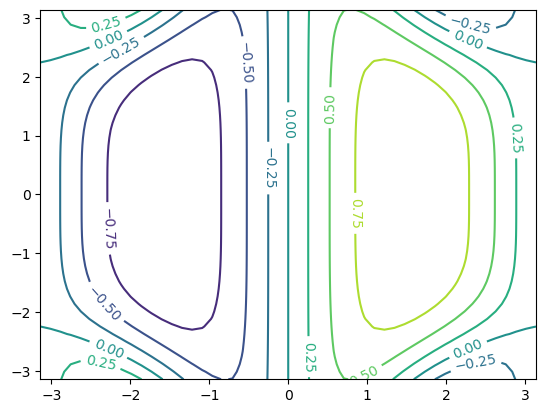

In [10]:
N = 50  # 50 puntos en cada dirección de los ejes
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(x, y)
Values = F(X,Y)
# Representación gráfica de las curvas de nivel
p = plt.contour(X, Y, Values)    
# Añadimos el valor numérico a cada curva de nivel
plt.clabel(p)  
plt.show()

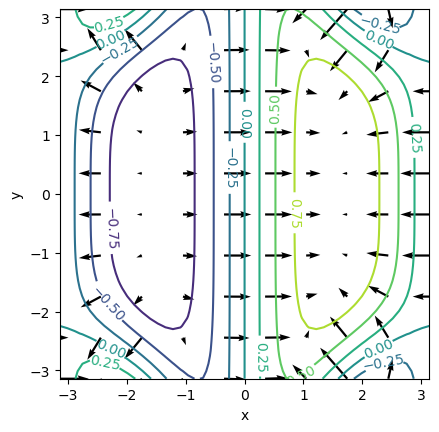

In [9]:
# Mediante `contour`  y `quiver` dibujamos la representación gráfica de las curvas de nivel y el gradiente:

Ng = 10  # 10 puntos en cada dirección de los ejes
xg = np.linspace(-np.pi, np.pi, Ng)
yg = np.linspace(-np.pi, np.pi, Ng)
Xg, Yg = np.meshgrid(xg, yg) # Representación gráfica del campo de vectores gradiente
Values_grad = grad_F(Xg,Yg)

plt.quiver(Xg, Yg, Values_grad[0], Values_grad[1]) 

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

### **Ejercicio 3**

Define una función de dos variables donde todas las curvas de nivel sean rectas. Representa graficamente las curvas de nivel y comprueba que el gradiente viene dado por un campo de vectores que posee la misma dirección. Verificando las condiciones anteriores, construye ejemplos en los cuales:
- El gradiente es constante para todos los puntos
- El gradiente tiene la misma dirección en todos los puntos pero varía el módulo de los vectores en cada punto

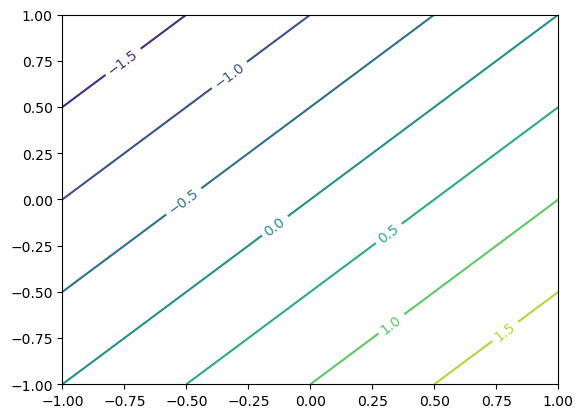

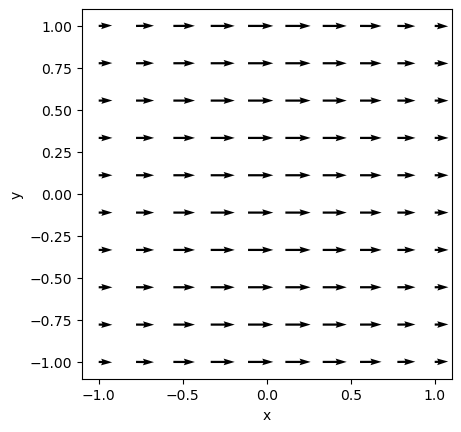

In [17]:
# TU CÓDIGO AQUÍ
x, y = sp.symbols('x y', real=True)
f = sp.Lambda((x,y),x-y)
F = sp.lambdify((x,y),f(x,y),"numpy") 
# Función NumPy con la expresión vectorial de grad(f)
grad_F = sp.lambdify((x,y),grad_f,"numpy") 


N = 50  # 50 puntos en cada dirección de los ejes
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
Values = F(X,Y)
# Representación gráfica de las curvas de nivel
p = plt.contour(X, Y, Values)    
# Añadimos el valor numérico a cada curva de nivel
plt.clabel(p)  
plt.show()


Ng = 10  # 10 puntos en cada dirección de los ejes
xg = np.linspace(-1, 1, Ng)
yg = np.linspace(-1, 1, Ng)
Xg, Yg = np.meshgrid(xg, yg) # Representación gráfica del campo de vectores gradiente
Values_grad = grad_F(Xg,Yg)

plt.quiver(Xg, Yg, Values_grad[0], Values_grad[1]) 

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

## Cálculo de la matriz hessiana

Para calcular la matriz hessiana de la funcion $f(x,y)=3x^2-5y^2$ en **SymPy**, escribimos:

In [ ]:
# Definimos las variables simbólicas x e y
x, y = sp.symbols('x y', real=True) 

# Definimos la función de dos variables f
f = 3*x**2-5*y**2
F = sp.Matrix([f])

print(F)
NablaF = F.jacobian([x, y])

print('f:',NablaF)
Hf = sp.hessian(f, (x,y))
display(Hf)

Matrix([[3*x**2 - 5*y**2]])
f: Matrix([[6*x, -10*y]])


Matrix([
[6,   0],
[0, -10]])

## Resolviendo problemas de extremos en varias variables con **SymPy**

Para determinar los extremos de una función de varias variables (suficientemente regular) con **SymPy**:

1) Calculamos en primer lugar su gradiente

2) Obtenemos los puntos en los que se anula el gradiente

3) Evaluamos la matriz hessiana en estos puntos y calculamos su determinante

A continuacion, calculamos los puntos críticos de la función $f(x,y)=3x^2-5y^2$:

In [24]:
print(sp.solve(NablaF, (x,y)))

{x: 0, y: 0}


La funcion tiene un único punto crítico, el $(0,0)$. Evaluamos la matriz hessiana en $(0,0)$:

In [25]:
Hf_punto_critico = Hf.subs({x:0,y:0})
print(Hf_punto_critico)

Matrix([[6, 0], [0, -10]])


Calculamos ahora el determinante de la matriz hessiana:

In [26]:
sp.det(Hf_punto_critico)

-60

En este caso, el determinante de la matriz hessiana es negativo. Al ser $f$ una función de dos variables, esto indica que $(0,0)$ es un punto de silla.

### Ejercicio 4

Determina y clasifica los puntos críticos de la función $f(x,y)=\sin(x)\cos(\frac{xy^2}{10})$.

In [16]:
import sympy as sp

x, y = sp.symbols('x y', real=True)
f = sp.sin(x) * sp.cos((x * y**2) / 10)

# Gradiente y Hessiana
NablaF = sp.Matrix([f]).jacobian([x, y])
Hf = sp.hessian(f, (x, y))

# Intentar resolver (Nota: puede tardar o ser incompleto por ser trigonométrica)
puntos_criticos = sp.solve(NablaF, (x, y))

for punto in puntos_criticos:
    # Sustituimos el punto en la Hessiana
    H_val = Hf.subs({x: punto[0], y: punto[1]})
    det_H = H_val.det()
    f_xx = H_val[0, 0] # Primer elemento de la matriz
    
    print(f"\nAnalizando punto: {punto}")
    display(H_val)
    
    if det_H < 0:
        print("Resultado: Punto de Silla")
    elif det_H > 0:
        if f_xx > 0:
            print("Resultado: Mínimo Relativo") # fxx > 0 -> Cóncava hacia arriba
        else:
            print("Resultado: Máximo Relativo") # fxx < 0 -> Cóncava hacia abajo
    else:
        print("Resultado: El criterio no es concluyente (Det = 0)")
        
    print(f"Determinante: {det_H}")


Analizando punto: (pi/2, 0)


Matrix([
[-1, 0],
[ 0, 0]])

Resultado: El criterio no es concluyente (Det = 0)
Determinante: 0

Analizando punto: (pi/2, -2*sqrt(5))


Matrix([
[              5, -2*sqrt(5)*pi/5],
[-2*sqrt(5)*pi/5,         pi**2/5]])

Resultado: Mínimo Relativo
Determinante: pi**2/5

Analizando punto: (pi/2, 2*sqrt(5))


Matrix([
[             5, 2*sqrt(5)*pi/5],
[2*sqrt(5)*pi/5,        pi**2/5]])

Resultado: Mínimo Relativo
Determinante: pi**2/5

Analizando punto: (pi, -sqrt(15))


Matrix([
[           -3, sqrt(15)*pi/5],
[sqrt(15)*pi/5,             0]])

Resultado: Punto de Silla
Determinante: -3*pi**2/5

Analizando punto: (pi, sqrt(15))


Matrix([
[            -3, -sqrt(15)*pi/5],
[-sqrt(15)*pi/5,              0]])

Resultado: Punto de Silla
Determinante: -3*pi**2/5

Analizando punto: (pi, -sqrt(5))


Matrix([
[            1, -sqrt(5)*pi/5],
[-sqrt(5)*pi/5,             0]])

Resultado: Punto de Silla
Determinante: -pi**2/5

Analizando punto: (pi, sqrt(5))


Matrix([
[           1, sqrt(5)*pi/5],
[sqrt(5)*pi/5,            0]])

Resultado: Punto de Silla
Determinante: -pi**2/5

Analizando punto: (3*pi/2, 0)


Matrix([
[1, 0],
[0, 0]])

Resultado: El criterio no es concluyente (Det = 0)
Determinante: 0

Analizando punto: (3*pi/2, -2*sqrt(15)/3)


Matrix([
[           -13/9, 2*sqrt(15)*pi/15],
[2*sqrt(15)*pi/15,       -3*pi**2/5]])

Resultado: Máximo Relativo
Determinante: 3*pi**2/5

Analizando punto: (3*pi/2, 2*sqrt(15)/3)


Matrix([
[            -13/9, -2*sqrt(15)*pi/15],
[-2*sqrt(15)*pi/15,        -3*pi**2/5]])

Resultado: Máximo Relativo
Determinante: 3*pi**2/5


### Ejercicio 5

Determina y clasifica los extremos absolutos de la función del ejercicio anterior si $(x,y)\in [-\pi,\pi]\times [-\pi,\pi]$.

In [ ]:
# TU CÓDIGO AQUÍ